In [403]:
%matplotlib inline
from importlib import reload

In [404]:
import re, time, os.path as path
from datetime import date
from math import floor
from concurrent.futures import ThreadPoolExecutor, as_completed

from lib import my_types, count

start = time.perf_counter()

max_workers = 50
root_dir = "/home/bwhite/Projects/bryanchriswhite"
repo_names = [
#     "storj",
#     "uplink",
    "uplink-c"
]
excluded_exts = set()
repo_counts: my_types.AllRepoFileAuthors = {}

# TODO: use lib.util.filter_ext
def filter_ext(filename):
    ext = path.splitext(filename)[1]
    ext_whitelist = (
        ".go", ".proto", ".c", ".h", ".sh", ".md", ".xml", ".wixproj", ".wsx", ".cs"
    )
    exclude = filename == "" or ext not in ext_whitelist
    
    if exclude:
        excluded_exts.add(ext)
    
    return exclude

# end = time.perf_counter()
# print(str.format("done: {}s!", round(end - start, 2)))
# print(str.format("excluded file extensions: {}", excluded_exts))

In [405]:
from concurrent.futures import Future, as_completed, wait
from typing import List, Tuple, Dict

from lib import git, my_types, repo, worktree
from lib.repo import RepoStat
from lib.worktree import Worktree
from lib.my_types import FileAuthors
[reload(m) for m in (git, my_types, repo, worktree, count)]

# max_samples = 128
samples: List[Tuple[date, str]] = []
commits: Dict[str, date] = {}
    
repo_samples: Dict[str, List[Tuple[date, str]]] = {}
repo_commits: Dict[str, Dict[str, date]] = {}
    
author_regex = re.compile("\S+\s+\(([\w ]+)\s*?\d{4,}")
commit_re = re.compile("^(\w+)\s+\(.*,\s+(\d{4,}-\d{2,}-\d{2,})\)$")
    
for repo in repo_names:
    repo_root = "/home/bwhite/Projects/bryanchriswhite/uplink-c"
    rs = RepoStat(repo_root)
    repo_line_authors_history = rs.line_authors_range('master', file_filter=filter_ext)
    results = []
    # TODO: repo_commit_*file*_authors ...
    for commit_date, repo_commit_line_authors in [f.result() for f in as_completed(repo_line_authors_history)]:
#         results.append((commit_date, [f.result() for f in repo_commit_line_authors.values() if f is not None]))
        for file, file_authors_f in repo_commit_line_authors.items():
                file_authors: FileAuthors = file_authors_f.result()
                if repo not in repo_counts:
                    repo_counts[repo]: Dict = {}
    #             repo_counts[repo][(commit_date, file_authors)]
                    #### TODO ----v: swap file and date; use timestamp!!!
                if commit_date not in repo_counts[repo]:
                    # TODO: THERE CAN BE MORE THAN ONE COMMIT PER DAY!!!
                    repo_counts[repo][commit_date] = {}
                repo_counts[repo][commit_date][file] = file_authors

        results.append((commit_date, [f.result() for f in repo_commit_line_authors.values() if f is not None]))


In [406]:
print(repo_counts)
# print([k for k in repo_counts['uplink-c'].values()][18])
# print(results)

{'uplink-c': {'2020-03-03': {'README.md': {'Egon Elbre': 3}, 'access.go': {'Egon Elbre': 171}, 'bucket.go': {'Egon Elbre': 165}, 'buckets.go': {'Egon Elbre': 118}, 'config.go': {'Egon Elbre': 86}, 'custommetadata.go': {'Egon Elbre': 108}, 'custommetadata_test.go': {'Egon Elbre': 49}, 'download.go': {'Egon Elbre': 147}, 'error.go': {'Egon Elbre': 70}, 'handles.go': {'Egon Elbre': 67}, 'handles_test.go': {'Egon Elbre': 39}, 'main.go': {'Egon Elbre': 17}, 'object.go': {'Egon Elbre': 129}, 'objects.go': {'Egon Elbre': 129}, 'project.go': {'Egon Elbre': 75}, 'scope.go': {'Egon Elbre': 34}, 'testsuite/testdata/access_test.c': {'Egon Elbre': 32}, 'testsuite/testdata/bucket_test.c': {'Egon Elbre': 110}, 'testsuite/testdata/buckets_test.c': {'Egon Elbre': 54}, 'testsuite/testdata/example_test.c': {'Egon Elbre': 196}, 'testsuite/testdata/helpers.h': {'Egon Elbre': 61}, 'testsuite/testdata/object_test.c': {'Egon Elbre': 113}, 'testsuite/testdata/objects_test.c': {'Egon Elbre': 69}, 'testsuite/tes

In [407]:
from lib import report, util
[reload(m) for m in (report, util)]

totals_dict = util.repo_counts_to_totals_dict(repo_counts)
# report.leaderboard(totals_dict)
totals_dict


{'uplink-c': {'2020-03-03': {'Egon Elbre': 2558},
  '2020-02-19': {'Egon Elbre': 1502},
  '2020-03-31': {'Egon Elbre': 2593,
   'Kaloyan Raev': 39,
   'Michal Niewrzal': 376},
  '2020-03-04': {'Egon Elbre': 2558},
  '2020-03-02': {'Egon Elbre': 2488},
  '2020-03-05': {'Egon Elbre': 2574},
  '2020-02-28': {'Egon Elbre': 2371},
  '2020-02-27': {'Egon Elbre': 2028},
  '2020-02-21': {'Egon Elbre': 2059},
  '2020-03-10': {'Egon Elbre': 2602, 'Michal Niewrzal': 115},
  '2020-02-18': {'Egon Elbre': 1345},
  '2020-03-19': {'Egon Elbre': 2593,
   'Kaloyan Raev': 39,
   'Michal Niewrzal': 376},
  '2020-03-12': {'Egon Elbre': 2605, 'Michal Niewrzal': 366},
  '2020-03-16': {'Egon Elbre': 2593,
   'Kaloyan Raev': 39,
   'Michal Niewrzal': 376},
  '2020-03-11': {'Egon Elbre': 2599, 'Michal Niewrzal': 252},
  '2020-02-20': {'Egon Elbre': 1805},
  '2020-03-13': {'Egon Elbre': 2604,
   'Kaloyan Raev': 39,
   'Michal Niewrzal': 366},
  '2020-04-06': {'Kaloyan Raev': 77,
   'Egon Elbre': 2593,
   'Michal

[datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 25), datetime.date(2020, 2, 27), datetime.date(2020, 2, 28), datetime.date(2020, 3, 2), datetime.date(2020, 3, 3), datetime.date(2020, 3, 4), datetime.date(2020, 3, 5), datetime.date(2020, 3, 6), datetime.date(2020, 3, 10), datetime.date(2020, 3, 11), datetime.date(2020, 3, 12), datetime.date(2020, 3, 13), datetime.date(2020, 3, 16), datetime.date(2020, 3, 19), datetime.date(2020, 3, 31), datetime.date(2020, 4, 6)]

{'Egon Elbre': [508, 1345, 1502, 1805, 2059, 2028, 2028, 2371, 2488, 2558, 2558, 2574, 2608, 2602, 2599, 2605, 2604, 2593, 2593, 2593, 2593], 'Michal Niewrzal': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 115, 252, 366, 366, 376, 376, 376, 376], 'Kaloyan Raev': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 39, 39, 39, 77]}

[[508, 1345, 1502, 1805, 2059, 2028, 2028, 2371, 2488, 2558, 2558, 2574, 2608, 2602, 25

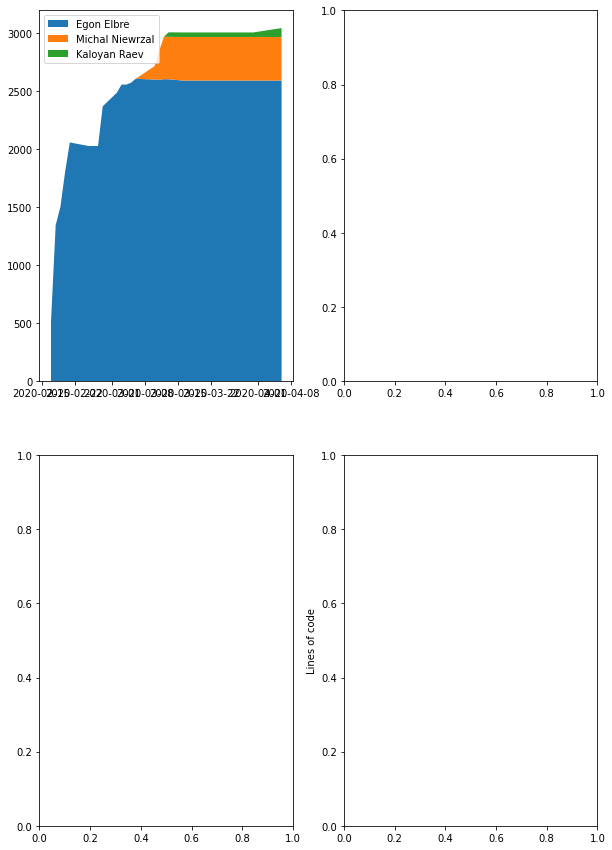

In [408]:
from lib import graph
reload(graph)

graph.repo_stackplots(totals_dict)

In [409]:
# from github import Github
#
# apikey = open("github.apikey")
#
# g = Github()
# org = g.get_organization("storj")
# repos = org.get_repos()
# page = repos.get_page(0)
#
# storj_repos = page

In [410]:
# [(r.name, r.created_at) for r in storj_repos]